# Data Loading

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Exploratory Data Analysis

## Descriptive statistic

In [ ]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


## Dataframe Structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

## Heatmap

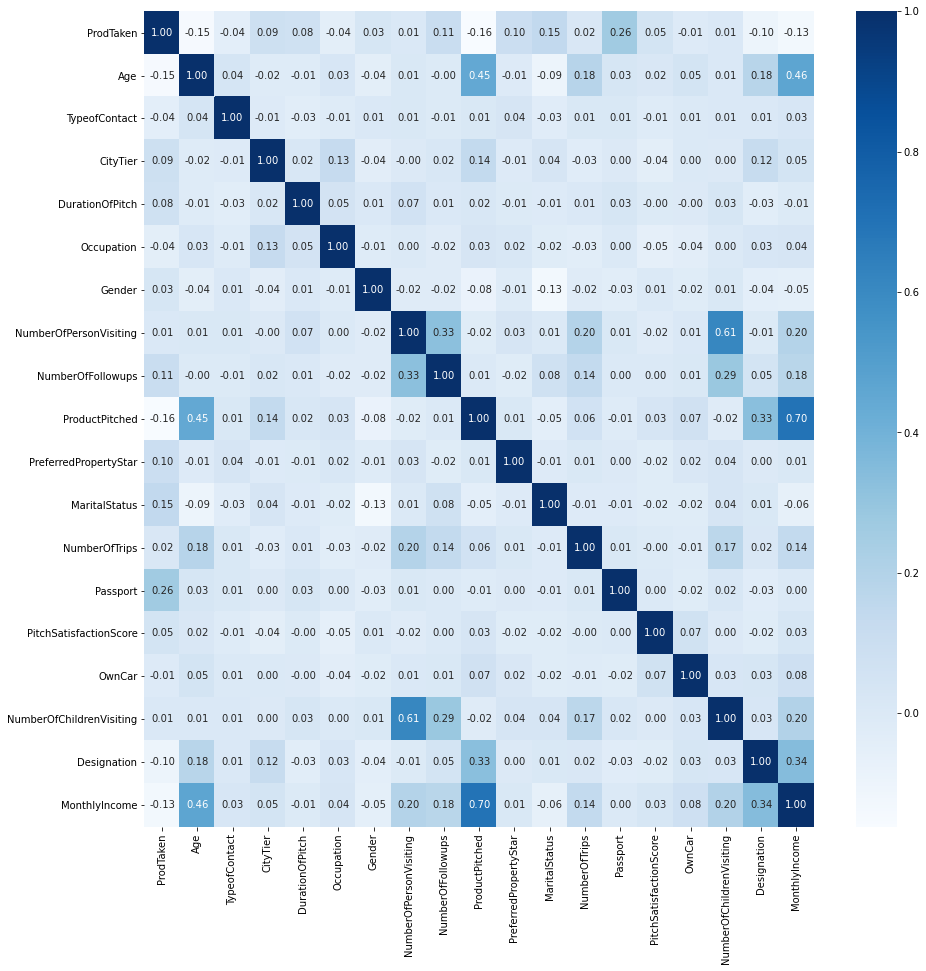

In [ ]:
df_heatmap = df.copy()

del df_heatmap['CustomerID']

for col_name in df_heatmap.columns:
    if(df_heatmap[col_name].dtype == 'object'):
        df_heatmap[col_name]= df_heatmap[col_name].astype('category')
        df_heatmap[col_name] = df_heatmap[col_name].cat.codes
        
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(df_heatmap.corr(), cmap='Blues', annot=True, fmt='.2f');

## Discussion result

### The feature that will be needed to build machine learning model are:

+ Based on the instruction :
    + Designation
    + Passport
    + Tier City
    + Martial status
    + occupation
    + monthly income
    + age
    + properties

+ Based on the correlation (above 0.3) :
    + numberOfFollowups
    + monthly income
    + age
    + numberOfPersonVisiting
    + numberOfChildrenVisiting
    + ProductPitched
    + Designation
    + Product taken


# Data Cleansing

## Feature Selection

In [ ]:
df_selected = df[['Designation', 'Passport', 'CityTier', 'MaritalStatus', 'Occupation', 'MonthlyIncome',  'Age', 'PreferredPropertyStar'
                  ,'NumberOfFollowups', 'NumberOfPersonVisiting', 'NumberOfChildrenVisiting', 'ProductPitched']].copy()
df_selected.head(3)

,Designation,Passport,CityTier,MaritalStatus,Occupation,MonthlyIncome,Age,PreferredPropertyStar,NumberOfFollowups,NumberOfPersonVisiting,NumberOfChildrenVisiting,ProductPitched
0,Manager,1,3,Single,Salaried,20993.0,41.0,3.0,3.0,3,0.0,Deluxe
1,Manager,0,1,Divorced,Salaried,20130.0,49.0,4.0,4.0,3,2.0,Deluxe
2,Executive,1,1,Single,Free Lancer,17090.0,37.0,3.0,4.0,3,0.0,Basic


## Missing Values

In [ ]:
df_selected.isnull().sum(axis=0)

Designation                   0
Passport                      0
CityTier                      0
MaritalStatus                 0
Occupation                    0
MonthlyIncome               233
Age                         226
PreferredPropertyStar        26
NumberOfFollowups            45
NumberOfPersonVisiting        0
NumberOfChildrenVisiting     66
ProductPitched                0
dtype: int64

In [ ]:
# Replaced with mean
df_selected['Age'].fillna(round(df['Age'].mean()), inplace=True)
df_selected['MonthlyIncome'].fillna(round(df['MonthlyIncome'].mean()), inplace=True)

# Replaced with median
df_selected['NumberOfFollowups'].fillna(df['NumberOfFollowups'].median(), inplace=True)

# Replaced with mode
df_selected['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)
df_selected['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)

In [ ]:
df_selected.isnull().sum(axis=0)

Designation                 0
Passport                    0
CityTier                    0
MaritalStatus               0
Occupation                  0
MonthlyIncome               0
Age                         0
PreferredPropertyStar       0
NumberOfFollowups           0
NumberOfPersonVisiting      0
NumberOfChildrenVisiting    0
ProductPitched              0
dtype: int64

## Duplicate Value

In [ ]:
df_selected.duplicated().sum()

395

In [ ]:
print('Duplicate Checking')
print('Before duplicate rows = ' + str(df_selected.shape))
df_selected = df_selected.drop_duplicates()
print('After duplicate rows = ' + str(df_selected.shape))

Duplicate Checking
Before duplicate rows = (4888, 12)
After duplicate rows = (4493, 12)


## Outlier values
### Nadiah

In [ ]:
df_selected

,Designation,Passport,CityTier,MaritalStatus,Occupation,MonthlyIncome,Age,PreferredPropertyStar,NumberOfFollowups,NumberOfPersonVisiting,NumberOfChildrenVisiting,ProductPitched
0,Manager,1,3,Single,Salaried,20993.0,41.0,3.0,3.0,3,0.0,Deluxe
1,Manager,0,1,Divorced,Salaried,20130.0,49.0,4.0,4.0,3,2.0,Deluxe
2,Executive,1,1,Single,Free Lancer,17090.0,37.0,3.0,4.0,3,0.0,Basic
3,Executive,1,1,Divorced,Salaried,17909.0,33.0,3.0,3.0,2,1.0,Basic
4,Executive,0,1,Divorced,Small Business,18468.0,38.0,4.0,3.0,2,0.0,Basic
...,...,...,...,...,...,...,...,...,...,...,...,...
4883,Manager,1,3,Unmarried,Small Business,26576.0,49.0,4.0,5.0,3,1.0,Deluxe
4884,Executive,1,1,Single,Salaried,21212.0,28.0,3.0,5.0,4,2.0,Basic
4885,Senior Manager,0,3,Married,Salaried,31820.0,52.0,4.0,4.0,4,3.0,Standard
4886,Executive,0,3,Single,Small Business,20289.0,19.0,3.0,4.0,3,2.0,Basic


Boxplot dkk

# Feature Engineering

## Target Column Generator

Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.


Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

In [ ]:
def segment(x):
    if x['Passport'] == 1 and x['CityTier'] == 3 and ((x['MaritalStatus'] == 'Single') or (x['MaritalStatus'] == 'Unmarried')) and x['Occupation'] == 'Large Business':
        chance = 'High'
    elif (x['MonthlyIncome'] >= 15000 and x['MonthlyIncome'] <= 25000) and (x['Age'] >= 15 and x['Age'] <= 30) and x['PreferredPropertyStar'] == 5:
        chance = 'High'
    else:
        chance = 'Low'
    return chance

In [ ]:
df_clean = df_selected.copy()

df_clean['Chance'] = df_clean.apply(lambda x: segment(x), axis=1) 
df_clean

,Designation,Passport,CityTier,MaritalStatus,Occupation,MonthlyIncome,Age,PreferredPropertyStar,NumberOfFollowups,NumberOfPersonVisiting,NumberOfChildrenVisiting,ProductPitched,Chance
0,Manager,1,3,Single,Salaried,20993.0,41.0,3.0,3.0,3,0.0,Deluxe,Low
1,Manager,0,1,Divorced,Salaried,20130.0,49.0,4.0,4.0,3,2.0,Deluxe,Low
2,Executive,1,1,Single,Free Lancer,17090.0,37.0,3.0,4.0,3,0.0,Basic,Low
3,Executive,1,1,Divorced,Salaried,17909.0,33.0,3.0,3.0,2,1.0,Basic,Low
4,Executive,0,1,Divorced,Small Business,18468.0,38.0,4.0,3.0,2,0.0,Basic,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,Manager,1,3,Unmarried,Small Business,26576.0,49.0,4.0,5.0,3,1.0,Deluxe,Low
4884,Executive,1,1,Single,Salaried,21212.0,28.0,3.0,5.0,4,2.0,Basic,Low
4885,Senior Manager,0,3,Married,Salaried,31820.0,52.0,4.0,4.0,4,3.0,Standard,Low
4886,Executive,0,3,Single,Small Business,20289.0,19.0,3.0,4.0,3,2.0,Basic,Low


In [ ]:
df_clean['Chance'].value_counts()

Low     4275
High     218
Name: Chance, dtype: int64

In [ ]:
df_clean = df_clean[df_clean['Designation'] == 'Executive']

df_clean['Chance'].value_counts()

Low     1549
High     143
Name: Chance, dtype: int64

## One Hot Encoding

In [ ]:
# One Hot encoding for designation column
Designation_dummies = pd.get_dummies(df_clean.Designation, prefix='Designation')
df_clean = pd.concat([df_clean, Designation_dummies], axis=1)
del df_clean['Designation']


# One Hot encoding for MaritalStatus column
MaritalStatus_dummies = pd.get_dummies(df_clean.MaritalStatus, prefix='MaritalStatus')
df_clean = pd.concat([df_clean, MaritalStatus_dummies], axis=1)
del df_clean['MaritalStatus']


# One Hot encoding for Occupation column
Occupation_dummies = pd.get_dummies(df_clean.Occupation, prefix='Occupation')
df_clean = pd.concat([df_clean, Occupation_dummies], axis=1)
del df_clean['Occupation']


# One Hot encoding for ProductPitched column
ProductPitched_dummies = pd.get_dummies(df_clean.ProductPitched, prefix='ProductPitched')
df_clean = pd.concat([df_clean, ProductPitched_dummies], axis=1)
del df_clean['ProductPitched']


df_clean

,Passport,CityTier,MonthlyIncome,Age,PreferredPropertyStar,NumberOfFollowups,NumberOfPersonVisiting,NumberOfChildrenVisiting,Chance,Designation_Executive,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,ProductPitched_Basic
2,1,1,17090.0,37.0,3.0,4.0,3,0.0,Low,1,0,0,1,0,1,0,0,0,1
3,1,1,17909.0,33.0,3.0,3.0,2,1.0,Low,1,1,0,0,0,0,0,1,0,1
4,0,1,18468.0,38.0,4.0,3.0,2,0.0,Low,1,1,0,0,0,0,0,0,1,1
5,0,1,18068.0,32.0,3.0,3.0,3,1.0,Low,1,0,0,1,0,0,0,1,0,1
6,1,1,17670.0,59.0,5.0,2.0,2,1.0,Low,1,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,0,2,21065.0,41.0,5.0,2.0,3,2.0,Low,1,0,1,0,0,0,0,1,0,1
4882,1,2,23317.0,37.0,5.0,5.0,3,2.0,Low,1,0,1,0,0,0,0,1,0,1
4884,1,1,21212.0,28.0,3.0,5.0,4,2.0,Low,1,0,0,1,0,0,0,1,0,1
4886,0,3,20289.0,19.0,3.0,4.0,3,2.0,Low,1,0,0,1,0,0,0,0,1,1


In [ ]:
df_clean['Chance'] = df_clean['Chance'].apply(lambda x : 1 if x == 'High' else 0)

In [ ]:
df_clean['Chance'].unique()

array([0, 1])

# Modelling

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, proba, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, proba, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

## Split Train and Test Data

In [ ]:
df = df_clean.copy()

# Split Feature and Label
X = df.drop(columns=['Chance'])
y = df['Chance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(model, y_pred, y_proba, X_train, y_train, X_test, y_test)

DecisionTreeClassifier(random_state=42)

Accuracy (Test Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 1.00
F1-Score (Test Set): 0.98
AUC: 1.00


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.9970501474926253


## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 60, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
                                                      41, 43, 45, 47, 49, 51,
                                                      53, 55, 57, 60],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             50],
                                        'min_samples_split': [2, 5, 10, 100]},
                   random_state=42, scoring='precision')

In [ ]:
# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
y_proba = model.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(model, y_pred, y_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.99
Precision (Test Set): 0.97
Recall (Test Set): 0.97
F1-Score (Test Set): 0.97
AUC: 1.00


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 50
Best max_features: auto


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 1.0
Test score:0.975


In [ ]:
model.best_estimator_.feature_importances_

array([0.00469952, 0.00232026, 0.        , 0.63653238, 0.35644784,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

Text(0.5, 0, 'score')

Text(0, 0.5, 'feature')

Text(0.5, 1.0, 'feature importance score')

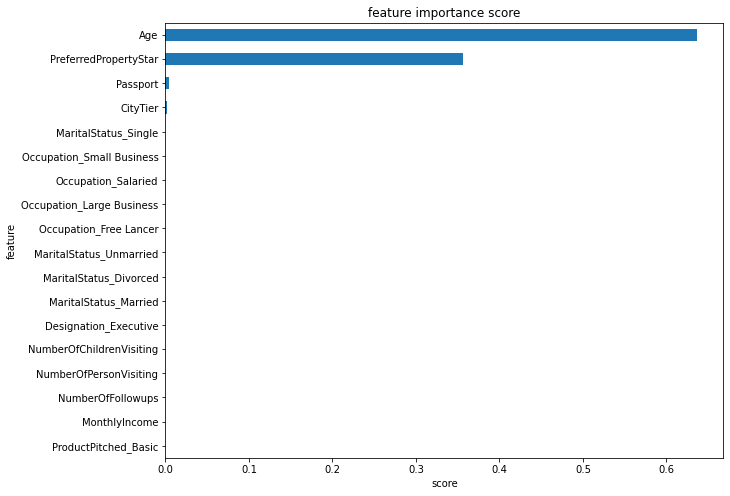

In [ ]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# Stacking

In [ ]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, model, hyperparameters, cv=5, scoring_fit='recall', scoring_test=recall_score):
    rs = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0, random_state=42) # Use GridSearch better if you have more resource & time
    rs.fit(X_train_data, y_train_data)
    best_model = rs.best_estimator_
    
    pred = rs.predict(X_test_data)
    score = scoring_test(y_test_data, pred)
    return [best_model, pred, score]

In [ ]:
models_to_train = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(random_state=42), XGBClassifier(random_state=42)]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-4,4,20)
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    { # Decision Tree
        'max_depth': np.linspace(1, 32, 32, endpoint=True),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': list(range(1,X_train.shape[1]))
    }, 
    { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    }
]

In [ ]:
models_preds_scores = []

for i, model in enumerate(models_to_train):
    hyperparameters = grid_parameters[i]
    result = algorithm_pipeline(X_train, X_test, y_train, y_test,  model, hyperparameters, cv=5)
    models_preds_scores.append(result)

[22:20:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/diakurnia/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

Model: LogisticRegression, Score: 0.04878048780487805
Model: KNeighborsClassifier, Score: 0.4634146341463415
Model: DecisionTreeClassifier, Score: 0.0
Model: RandomForestClassifier, Score: 0.975609756097561
Model: AdaBoostClassifier, Score: 1.0
Model: XGBClassifier, Score: 1.0


In [ ]:
# define level-1 algorithm
level1 = list()
level1.append(('lr', LogisticRegression(C=4.281332398719396)))
level1.append(('knn', KNeighborsClassifier(algorithm='brute', leaf_size=48, n_neighbors=17, p=1)))
level1.append(('dt', DecisionTreeClassifier(max_depth=31.0, max_features=25, min_samples_leaf=0.4, min_samples_split=0.30000000000000004)))
level1.append(('rf', RandomForestClassifier(max_depth=110, max_features='sqrt', min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1)))
level1.append(('ab', AdaBoostClassifier(learning_rate=0.05831578947368421, n_estimators=200, random_state=42)))

# define level-2 algorithm
level2 = XGBClassifier(alpha=0.30000000000000004, base_score=0.5, booster='gbtree',
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
                eta=0.13131313131313133, gamma=0.4, gpu_id=-1,
                importance_type='gain',
                learning_rate=0.13131313, max_delta_step=0, max_depth=90,
                min_child_weight=6, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
                reg_alpha=0.300000012, reg_lambda=0, scale_pos_weight=1,
                subsample=1, tree_method='hist', validate_parameters=1,
                verbosity=None)

# Fit model
stacking_model = StackingClassifier(estimators=level1, final_estimator=level2, cv=5)
stacking_model.fit(X_train,y_train)
y_pred = stacking_model.predict(X_test)#Check performa dari model
eval_classification(stacking_model, y_pred, X_train, y_train, X_test, y_test)

AttributeError: 'str' object has no attribute 'decode'